In [1]:
import glob
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [11]:

# File and folder paths
dirpath = r'/Volumes/GUILHERME/_microsoft_roads/'

out_fp = 'results'

# Make a search criteria to select the DEM files
search_criteria = "*10km_RoadDensity.gpkg"
q = os.path.join(dirpath, search_criteria)

regions = glob.glob(q)
regions

['/Volumes/GUILHERME/_microsoft_roads/AfricaCenter_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AfricaEast_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AfricaNorth_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AfricaSouth_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AfricaWest_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AmericaCenter_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AsiaCenter_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AsiaNorth_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AsiaSouthEast_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/AsiaSouth_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/Canada_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/CaribbeanIslands_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/China_OSM_10km_RoadDensity.gpkg',
 '/Volumes/GUILHERME/_microsoft_roads/Euro

In [12]:
grid = gpd.read_file(regions[0])

for region in regions[1:]:
    region_df = gpd.read_file(region)
    grid = pd.concat([grid, region_df])

grid

,grid_id,length,area,road_density,geometry
0,1714628,3209.821371,100000000.0,32.098214,"POLYGON ((639000.000 40000.000, 649000.000 400..."
1,1715929,14027.678677,100000000.0,140.276787,"POLYGON ((649000.000 50000.000, 659000.000 500..."
2,1715930,1576.865784,100000000.0,15.768658,"POLYGON ((649000.000 40000.000, 659000.000 400..."
3,1715931,608.726477,100000000.0,6.087265,"POLYGON ((649000.000 30000.000, 659000.000 300..."
4,1715932,999.909772,100000000.0,9.999098,"POLYGON ((649000.000 20000.000, 659000.000 200..."
...,...,...,...,...,...
31404,597937,93609.697237,100000000.0,936.096972,"POLYGON ((-8041000.000 5760000.000, -8031000.0..."
31405,597938,16516.890670,100000000.0,165.168907,"POLYGON ((-8041000.000 5750000.000, -8031000.0..."
31406,599238,63892.052024,100000000.0,638.920520,"POLYGON ((-8031000.000 5770000.000, -8021000.0..."
31407,599239,23635.875569,100000000.0,236.358756,"POLYGON ((-8031000.000 5760000.000, -8021000.0..."


<AxesSubplot:>

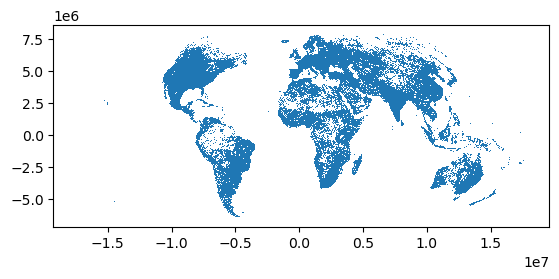

In [13]:
%matplotlib inline
grid.plot()

In [14]:
grid = grid.dissolve(by="grid_id", aggfunc="sum")

In [15]:
grid

,geometry,length,area,road_density
grid_id,,,,
22423,"POLYGON ((-17491000.000 -2120000.000, -1748100...",614.820488,100000000.0,6.148205
22822,"POLYGON ((-17481000.000 -2090000.000, -1747100...",113.856331,100000000.0,1.138563
23474,"POLYGON ((-17461000.000 -570000.000, -17451000...",367.962205,100000000.0,3.679622
23629,"POLYGON ((-17461000.000 -2120000.000, -1745100...",75.498564,100000000.0,0.754986
24033,"POLYGON ((-17451000.000 -2140000.000, -1744100...",2629.906901,100000000.0,26.299069
...,...,...,...,...
3765152,"POLYGON ((17759000.000 -990000.000, 17769000.0...",493.734020,100000000.0,4.937340
3765653,"POLYGON ((17769000.000 -980000.000, 17779000.0...",891.800504,100000000.0,8.918005
3767655,"POLYGON ((17809000.000 -920000.000, 17819000.0...",9321.749102,100000000.0,93.217491


<AxesSubplot:>

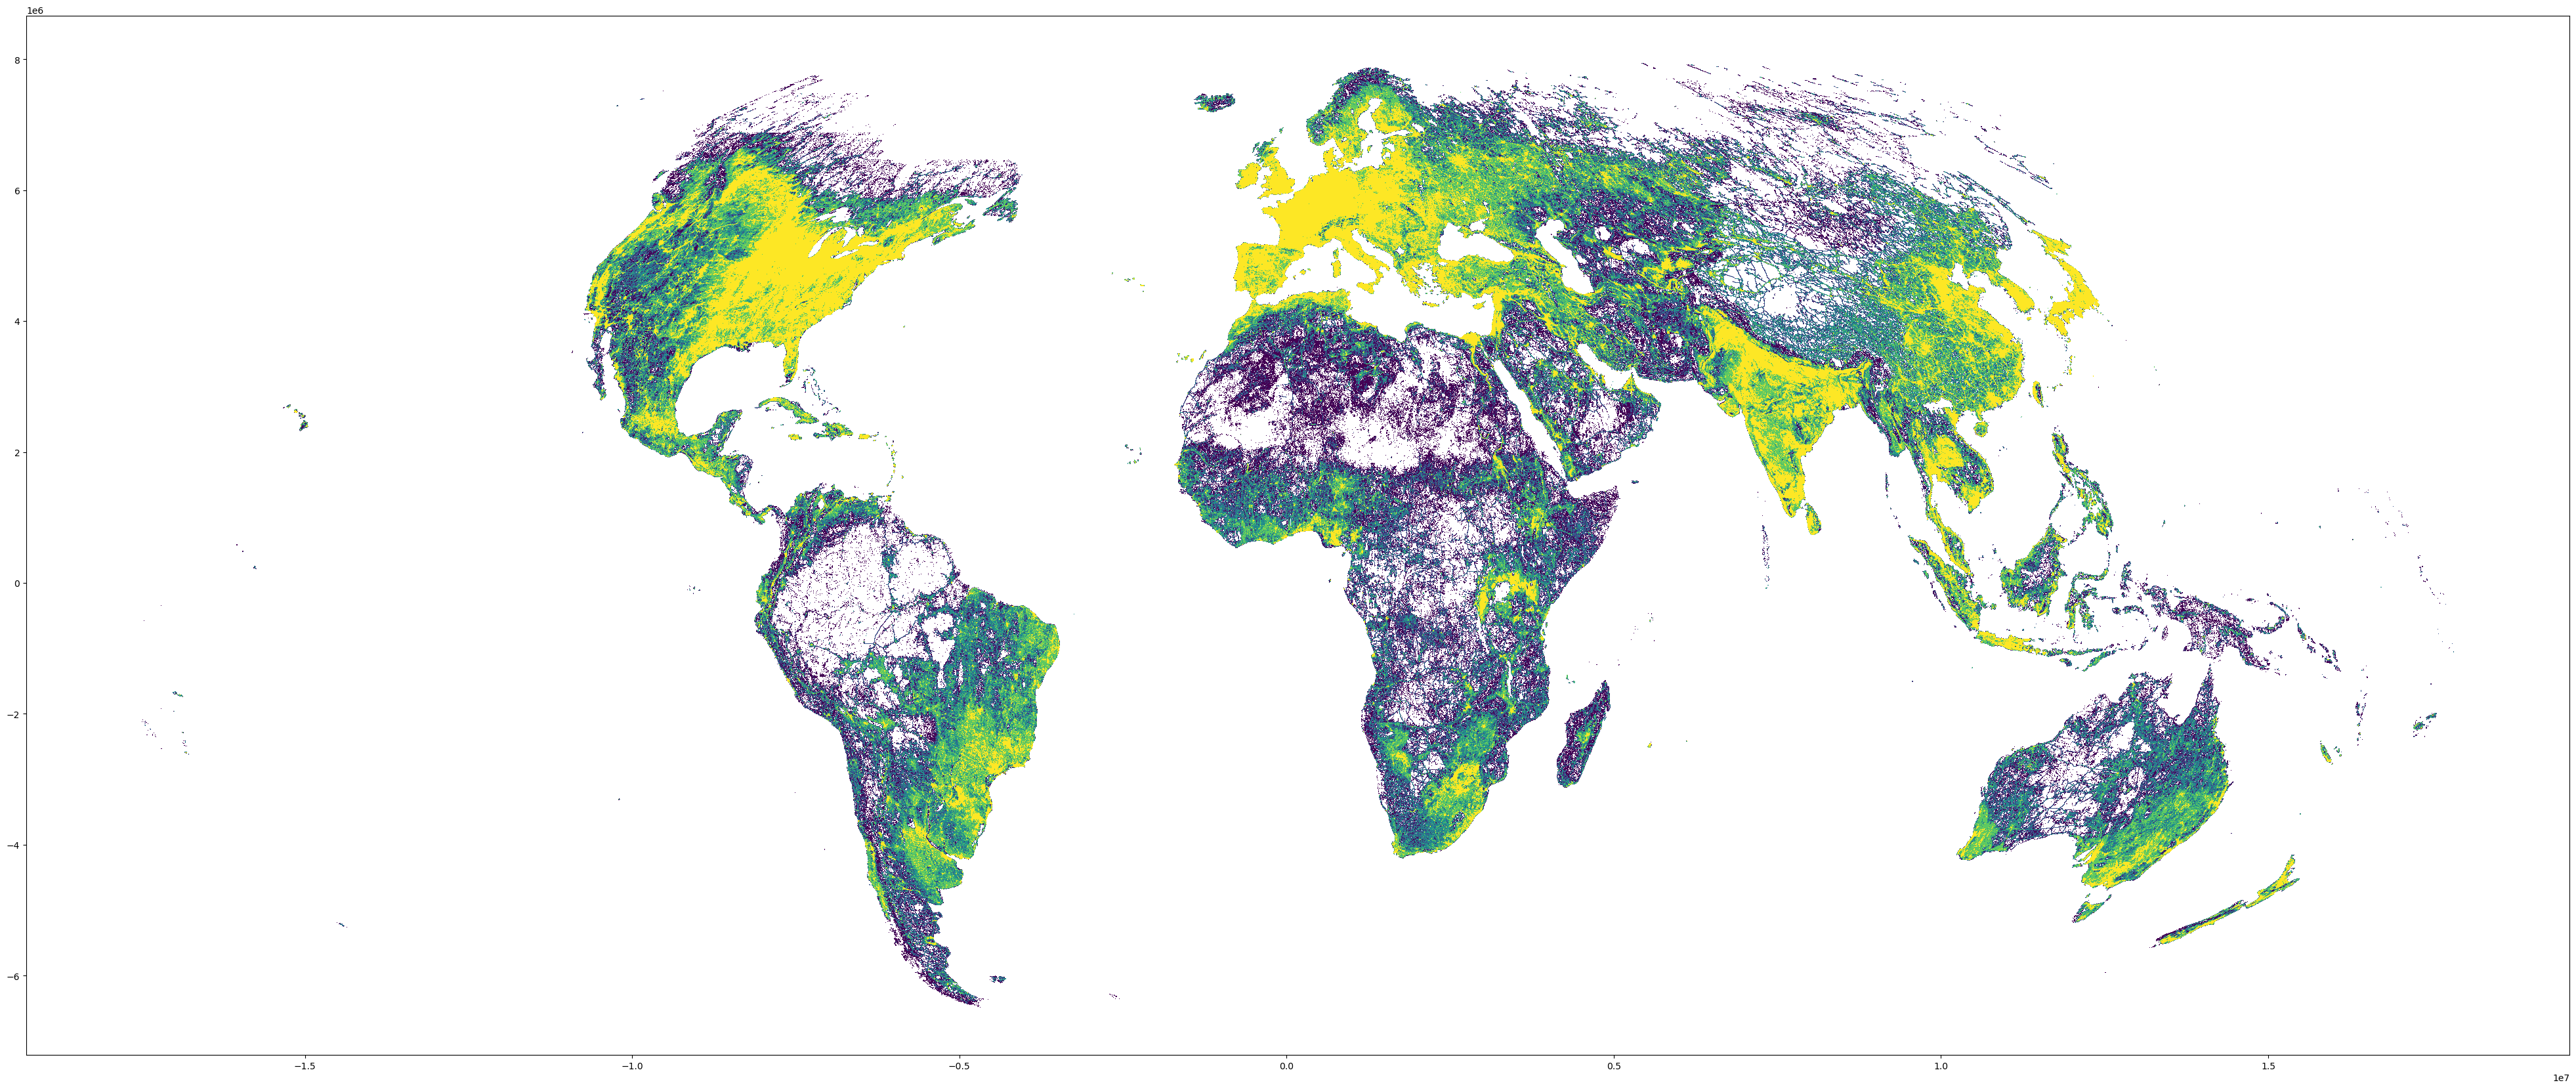

In [16]:
grid.plot(column='road_density', scheme='quantiles', cmap='viridis', figsize=(50, 40))

In [17]:
grid.to_file('World_10km_RoadDensity.gpkg')